# SI 618: Introduction to Machine Learning

Version 2021.03.12.1.CT

We suggest you use extra markdown blocks or code comments to record your notes.

In [1]:
import pandas as pd

Seaborn (and other packages) come bundled with datasets.  Let's load the infamous Fisher's Iris Dataset:

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercise 1:
Create a 2-d scatterplot of petal_width (on the y-axis) vs. petal_length (on the x-axis) that includes a regression line.

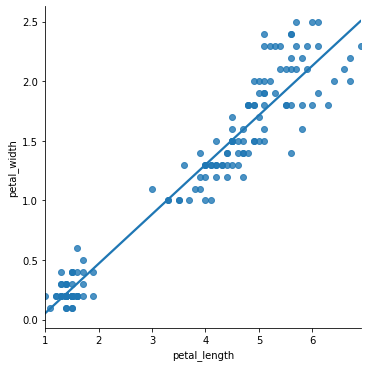

In [4]:
_ = sns.lmplot(data=iris,x='petal_length',y='petal_width', ci=None)  # ci confidence interval

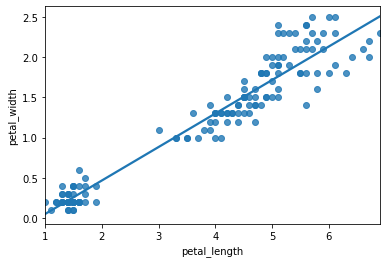

In [5]:
_ = sns.regplot(data=iris,x='petal_length',y='petal_width',ci=None)

### Exercise 2:
Create a regression model of petal_width as the outcome variable and petal_length as the explanatory variable.  You might find the notebook on correlation and regression to be helpful here.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
lm = smf.ols('Q("petal_width") ~ Q("petal_length")',data=iris).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("petal_width")   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           4.68e-86
Time:                        13:54:12   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3631      0.040     -9.131      0.000      -0.442      -0.285
Q("petal_length")     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Introduction to scikit-learn

Recall the general process for using a scikit-learn estimator:
1. choose appropriate class that implements what you want to do and import it
1. choose model hyperparameters (or accept default ones, but be careful) and instantiate class
1. arrange data into features and labels
1. .fit() your model to the data
1. apply model to new data with .predict() for supervised learning

Let's do that with the regression model we implemented using statsmodels above:



1. choose appropriate class that implements what you want to do and import it

This takes a bit of experience to figure out, but we'll cover the common ones over the next few classes.  For now, I'll tell you that we want to use sklearn.linear_model.LinearRegression.  Import only that class into your default namespace:

### Exercise 3: write the correct line to import LinearRegression from the sklearn.linear_model module:

In [8]:
from sklearn.linear_model import LinearRegression

### Exercise 4: choose model hyperparameters (or accept default ones, but be careful) and instantiate class
It's ok to accept the defaults this time. Let's assign the model to a variable called `lm`.

In [9]:
lm = LinearRegression()

### Exercise 5: arrange data into features and labels
Create one dataframe for the 'y' values (and call it 'y') and another dataframe for the 'x' values (and call it 'X').

In [10]:
y = iris[['petal_width']]
X = iris[['petal_length']]

### Exercise 6: .fit() your model to the data

In [11]:
model = lm.fit(X,y)

### Exercise: apply model to new data with .predict() 
What's the estimated value for petal_width if the petal_length is 10?

In [12]:
import numpy as np

In [13]:
np.array([10]).reshape(-1,1).shape  # -1 retains the previous number of row

(1, 1)

In [14]:
lm.predict(np.array([10]).reshape(-1,1))

array([[3.79447864]])

Great!  But what does our model actually look like?

We can always access a measure of how good our model is by calling .score(X,y):

In [15]:
lm.score(X,y)  # R^2

0.9271098389904927

In the case of LinearRegression, we can access the coefficients for the equation:

In [16]:
lm.coef_  # X.columns

array([[0.41575542]])

and the value of the intercept:

In [17]:
lm.intercept_

array([-0.36307552])

Which, if we've done everything right, should match the results we got from statsmodels!

## Cross-validation

In [18]:
from sklearn.model_selection import cross_validate

In [19]:
result = cross_validate(lm, X, y, scoring='r2') # see docstring for more details

In [20]:
result['test_score']

array([-0.11487018,  0.95263007,  0.38011675,  0.68756687, -0.45925651])

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Note: unlike most other scores, R^2 score may be negative (it need not actually be the square of a quantity R).

See also https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative


What other scorers are available?

In [21]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Part II - Machine Learning Pipelines for Regression


## Goal: to predict the flipper length of penguins given a number of features about them.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [24]:
penguins = sns.load_dataset('penguins')

In [25]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
penguins.describe()  # include='all'

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Task 1
Are there any missing values?  Deal with the missing values.

In [28]:
penguins.dropna(inplace=True)

### Task 2
Use .value_counts() to get a sense of the distribution of categorical variables.

In [29]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [30]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [31]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

### Task 3
Create scatterplots for all combinations of numeric variables (hint: sns.pairplot() might be useful)

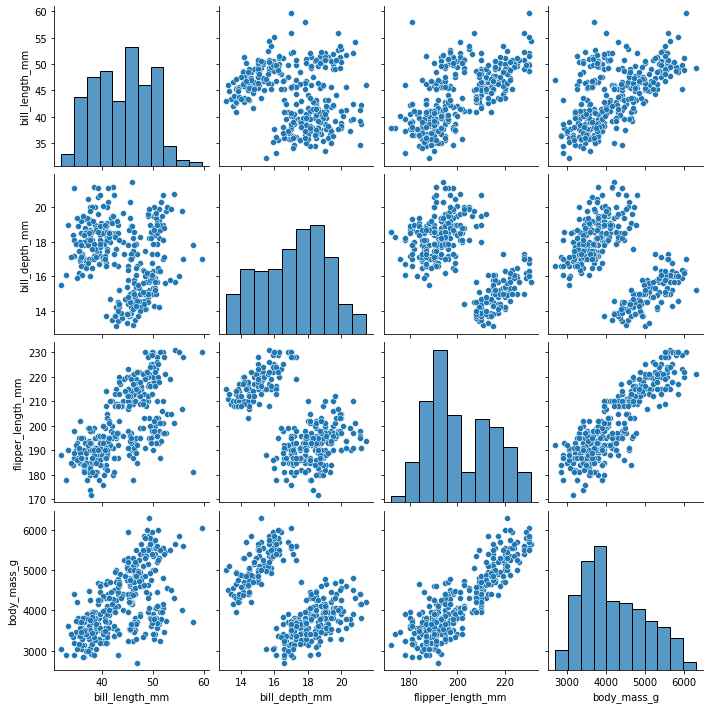

In [32]:
sns.pairplot(data=penguins)

### Task 4
Split the data into training and testing sets, ensuring that the same distribution of species exists in the split data sets as the distribution of species in the original dataframe.

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(penguins, penguins['species']):
    strat_train_set = penguins.iloc[train_index]
    strat_test_set = penguins.iloc[test_index]

strat_test_set['species'].value_counts() / len(strat_test_set)

Adelie       0.432836
Gentoo       0.358209
Chinstrap    0.208955
Name: species, dtype: float64

### Task 5
Create a design matrix (`penguins_X`) and a label matrix (`penguins_y`) from the stratified training set.

In [40]:
penguins_X = strat_train_set.drop('flipper_length_mm', axis=1)
penguins_y = strat_train_set[['flipper_length_mm']]

In [41]:
penguins_X.head()

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.9,13.3,5100.0,Female
205,Chinstrap,Dream,50.7,19.7,4050.0,Male
337,Gentoo,Biscoe,48.8,16.2,6000.0,Male
123,Adelie,Torgersen,41.4,18.5,3875.0,Male
38,Adelie,Dream,37.6,19.3,3300.0,Female


In [42]:
penguins_y.head()

,flipper_length_mm
268,213.0
205,203.0
337,222.0
123,202.0
38,181.0


### Task 6
Create a pipeline to apply a `StandardScaler()` to all numeric values and a `OneHotEncoder()` to the categorical variables in `penguins_X`. Assign the resulting matrix to a variable called `penguins_prepared`.

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attributes = penguins_X.select_dtypes(include=[np.number])
cat_attributes = penguins_X.select_dtypes(exclude=[np.number])
num_attributes

,bill_length_mm,bill_depth_mm,body_mass_g
268,44.9,13.3,5100.0
205,50.7,19.7,4050.0
337,48.8,16.2,6000.0
123,41.4,18.5,3875.0
38,37.6,19.3,3300.0
...,...,...,...
24,38.8,17.2,3800.0
201,49.8,17.3,3675.0
43,44.1,19.7,4400.0
255,48.4,16.3,5400.0


In [44]:
cat_attributes

,species,island,sex
268,Gentoo,Biscoe,Female
205,Chinstrap,Dream,Male
337,Gentoo,Biscoe,Male
123,Adelie,Torgersen,Male
38,Adelie,Dream,Female
...,...,...,...
24,Adelie,Biscoe,Male
201,Chinstrap,Dream,Female
43,Adelie,Dream,Male
255,Gentoo,Biscoe,Male


In [46]:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attributes.columns),
    ('cat', OneHotEncoder(), cat_attributes.columns)
])

In [47]:
penguins_transformed = full_pipeline.fit_transform(penguins_X)
penguins_transformed

array([[ 0.16732502, -1.99231135,  1.08239437, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22705014,  1.25552054, -0.21564233, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87989881, -0.52063753,  2.19499725, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.02115604,  1.25552054,  0.21703657, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80681432, -0.46989015,  1.453262  , ...,  0.        ,
         0.        ,  1.        ],
       [-1.91558298,  0.90028893, -0.77194377, ...,  1.        ,
         1.        ,  0.        ]])

### Task 7
Fit a linear regression to penguins_prepared and penguins_y.

In [ ]:
# insert your code here

### Task 8
Use the fitted model to show the predicted values for the first 5 rows of data.

In [ ]:
# insert your code here

### Task 9
Show the mean and standard deviation of the root mean squared error for your model.

In [ ]:
# Insert your code here

### Task 10
Apply your model to the test data (from your train-test split) and report the final root mean squared error (RMSE).

In [ ]:
# Insert your code here